In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

plt.style.use('ggplot')
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

#- Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

In [3]:
sales_train_df = pd.read_csv('train (1).csv')

In [4]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
sales_train_df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.0,322.0,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.0,2.0,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5774.0,3850.0,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.0,464.0,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
#### Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

In [8]:
store_info_df = pd.read_csv('store (2).csv')
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [9]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
store_info_df.memory_usage()

Index                         128
Store                        8920
StoreType                    8920
Assortment                   8920
CompetitionDistance          8920
CompetitionOpenSinceMonth    8920
CompetitionOpenSinceYear     8920
Promo2                       8920
Promo2SinceWeek              8920
Promo2SinceYear              8920
PromoInterval                8920
dtype: int64

In [12]:
store_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


## EXPLORE DATASET

<AxesSubplot:>

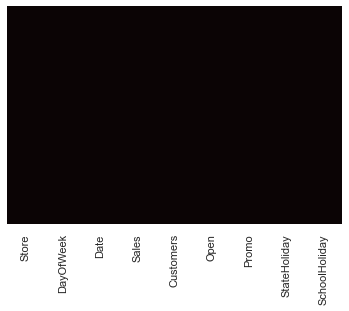

In [13]:
sns.heatmap(sales_train_df.isnull(),yticklabels=False,cbar=False,cmap='mako')

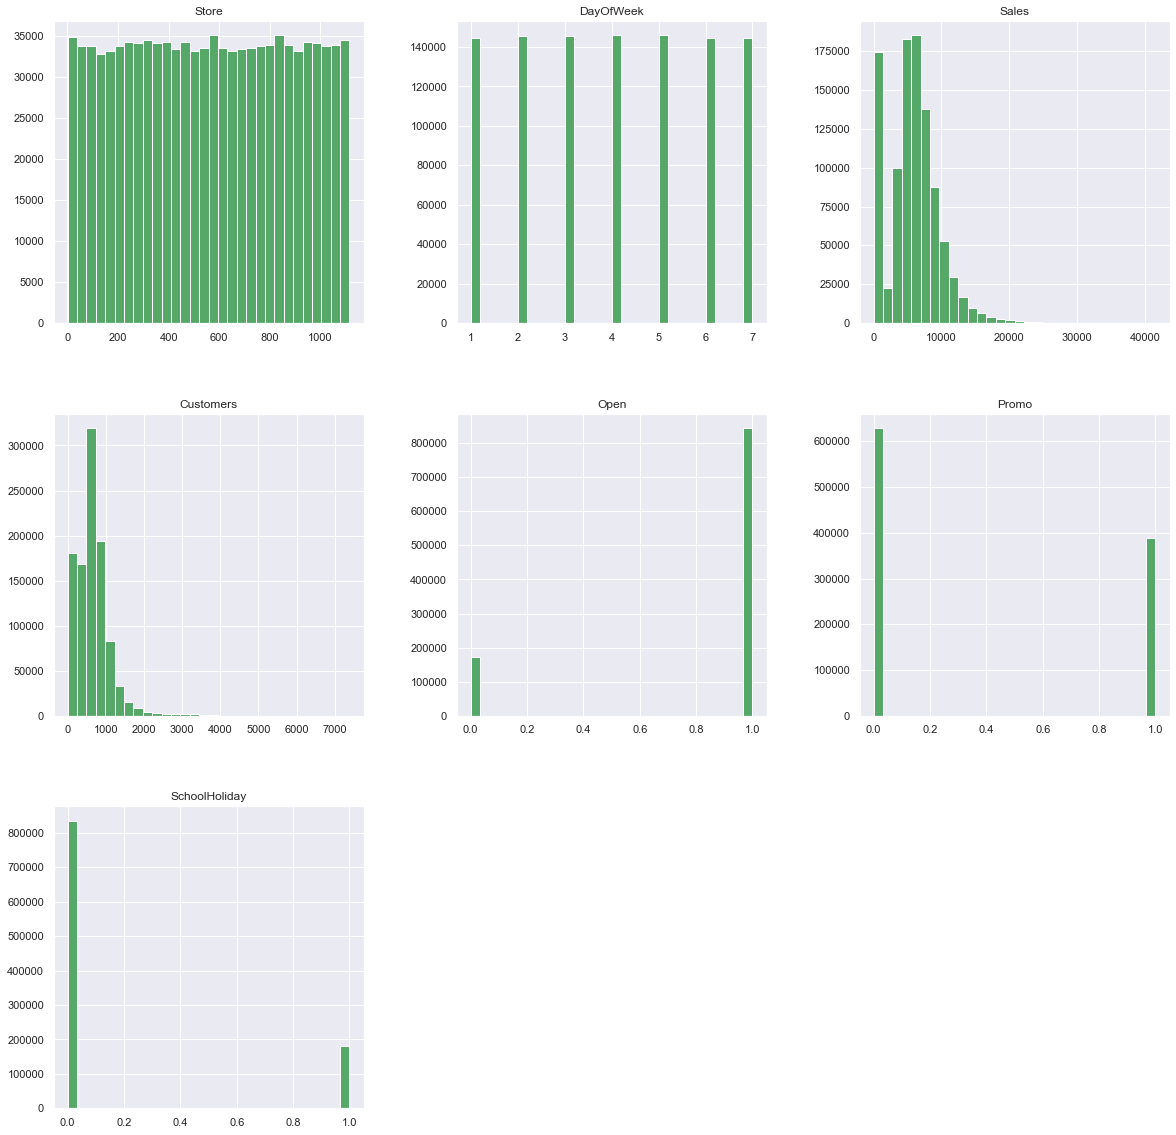

In [14]:
sales_train_df.hist(bins=30,figsize=(20,20),color='g')
plt.show()
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time


In [15]:
sales_train_df['Customers'].max()

7388

In [16]:
closed_train_df = sales_train_df[sales_train_df['Open']==0]
open_train_df = sales_train_df[sales_train_df['Open']==1]

In [17]:
print('Total =', len(sales_train_df))
print('Number of closed stores =', len(closed_train_df))
print('Number of opened stores =', len(open_train_df))

Total = 1017209
Number of closed stores = 172817
Number of opened stores = 844392


In [18]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] ==1]

In [19]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [20]:
# Let's drop the open column since it has no meaning now
sales_train_df.drop(['Open'],axis=1, inplace=True)

In [21]:
sales_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [22]:
sales_train_df.describe().T
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

,count,mean,std,min,25%,50%,75%,max
Store,844392.0,558.422920,321.731914,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844392.0,3.520361,1.723689,1.0,2.0,3.0,5.0,7.0
Sales,844392.0,6955.514291,3104.214680,0.0,4859.0,6369.0,8360.0,41551.0
Customers,844392.0,762.728395,401.227674,0.0,519.0,676.0,893.0,7388.0
Promo,844392.0,0.446352,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844392.0,0.193580,0.395103,0.0,0.0,0.0,0.0,1.0


## EXPLORE STORES INFORMATION DATA

<AxesSubplot:>

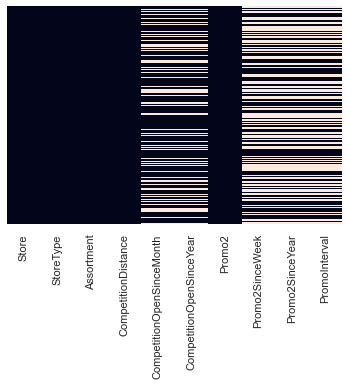

In [23]:
sns.heatmap(store_info_df.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [24]:
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [25]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [26]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [27]:
store_info_df[store_info_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
str_col =['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_col:
    store_info_df[str].fillna(0, inplace=True)

<AxesSubplot:>

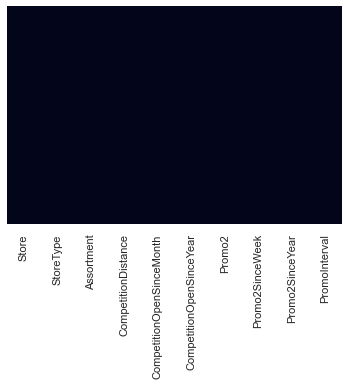

In [29]:
 sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="rocket")


In [30]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(),inplace=True)

<AxesSubplot:>

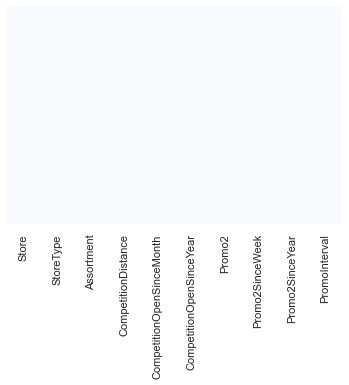

In [31]:
 sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

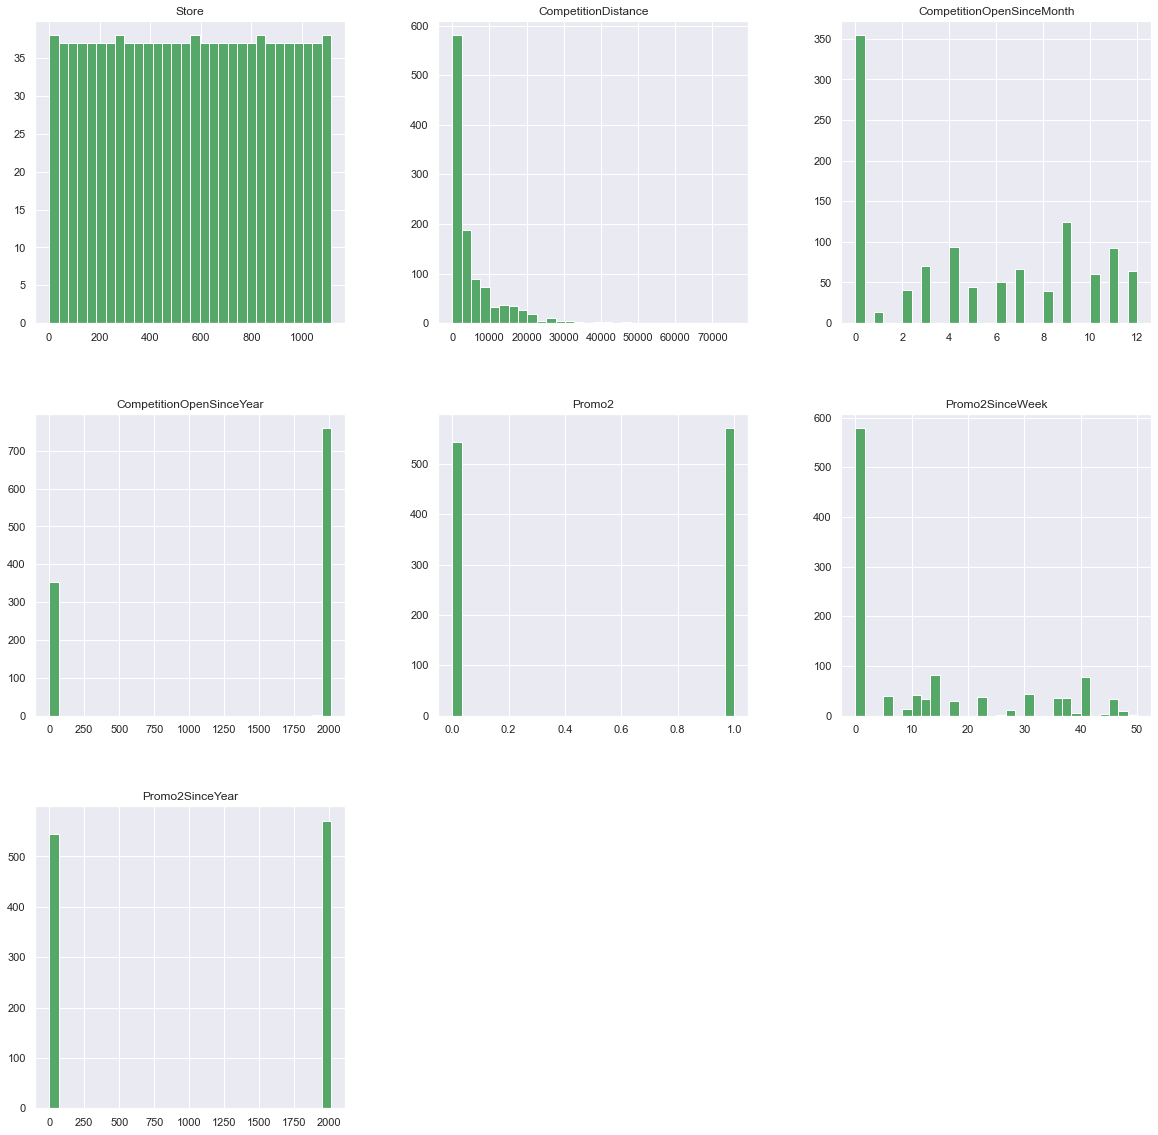

In [32]:
store_info_df.hist(bins=30, figsize=(20,20), color='g');

## EXPLORE MERGED DATASET

In [33]:
sales_train_all_df = pd.merge(sales_train_df,store_info_df,how= 'inner', on= 'Store')

In [34]:
sales_train_all_df.to_csv('test.csv', index=False)

In [35]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [36]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<AxesSubplot:>

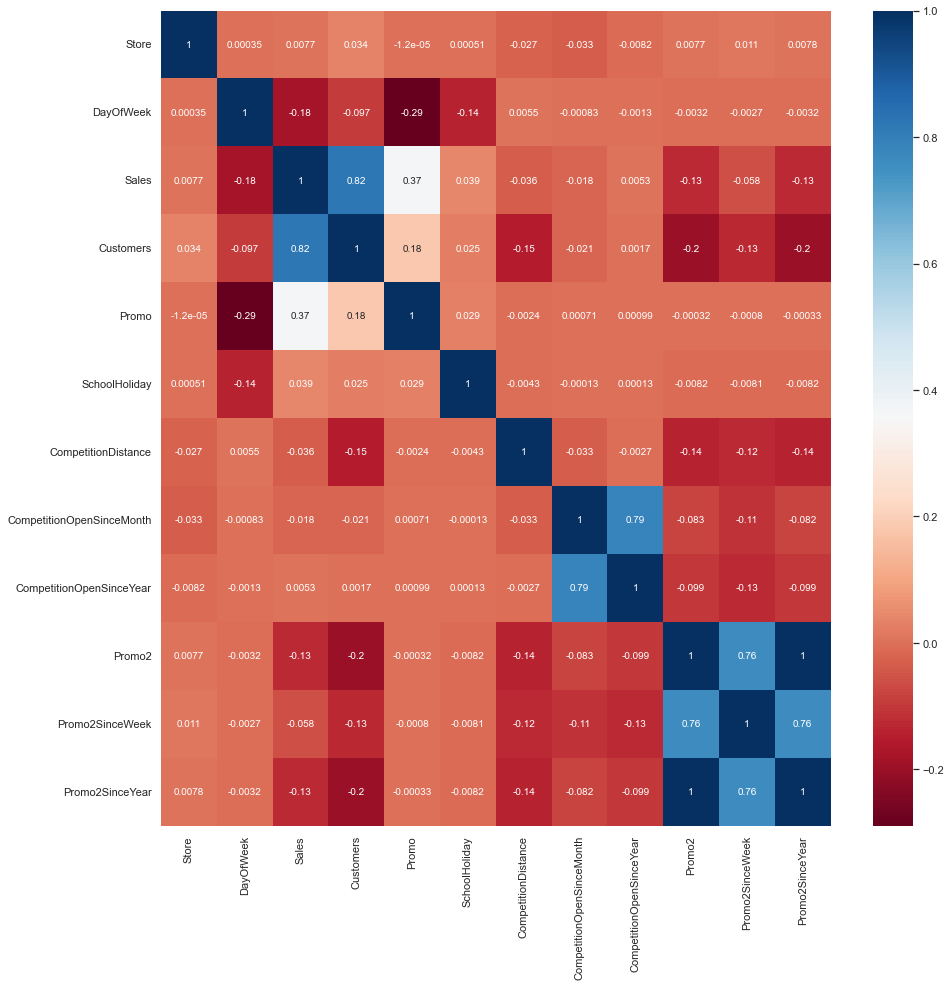

In [37]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True, cmap='RdBu')

## Datetime Analysis

In [38]:
# Let's separate the year and put it into a separate column 
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [39]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013


In [40]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [41]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


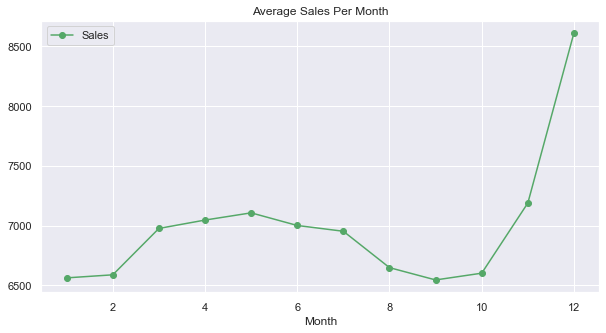

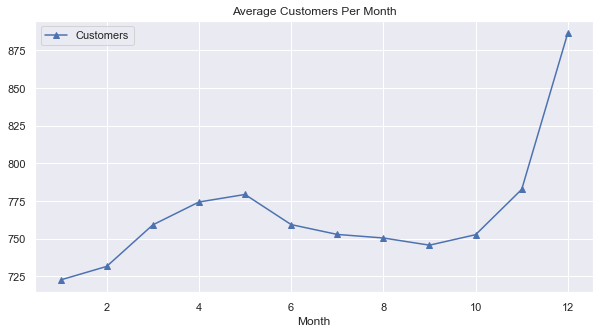

In [42]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe
axis = sales_train_all_df.groupby('Month')['Sales'].mean().plot(figsize=(10,5),marker='o', color='g')
axis.set_title('Average Sales Per Month')
plt.legend()

plt.figure()

axis = sales_train_all_df.groupby('Month')['Customers'].mean().plot(figsize=(10,5),marker='^', color='b')
axis.set_title('Average Customers Per Month')
plt.legend()

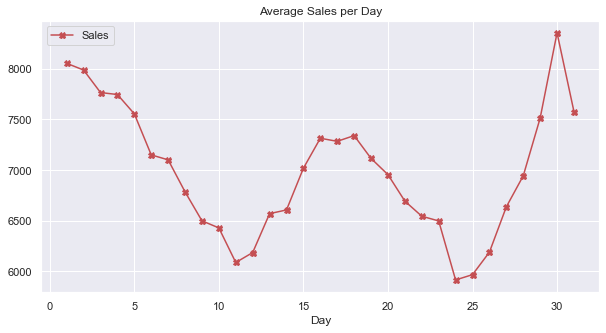

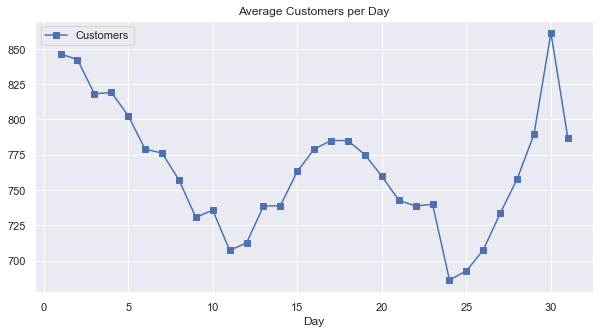

In [43]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

ax = sales_train_all_df.groupby('Day')['Sales'].mean().plot(figsize=(10,5), marker='X', color = 'r')
ax.set_title('Average Sales per Day')
plt.legend()

plt.figure()

ax = sales_train_all_df.groupby('Day')['Customers'].mean().plot(figsize=(10,5), marker='s', color = 'b')
ax.set_title('Average Customers per Day')
plt.legend()

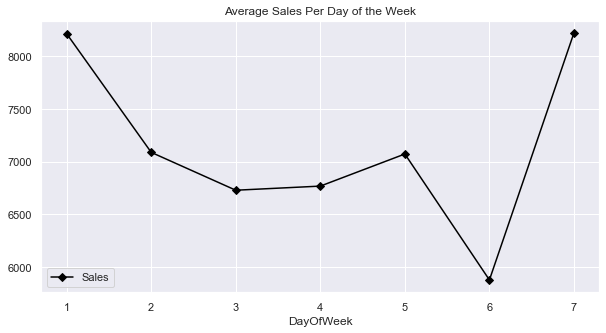

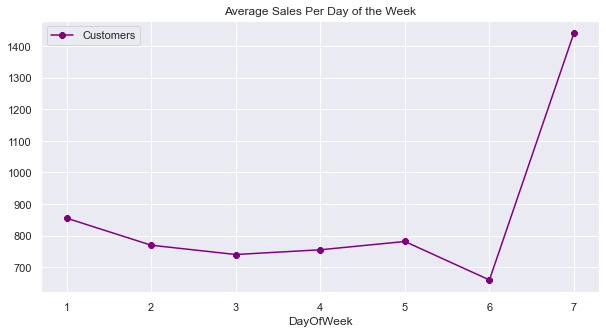

In [79]:
# Let's do the same for the day of the week  (note that 7 = Sunday)

axis = sales_train_all_df.groupby('DayOfWeek')['Sales'].mean().plot(figsize=(10,5),marker='D',color='black')
axis.set_title('Average Sales Per Day of the Week')
plt.legend()

plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')['Customers'].mean().plot(figsize=(10,5),marker='8',color='purple')
axis.set_title('Average Sales Per Day of the Week')
plt.legend()

In [45]:
#fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date','StoreType'])['Sales'].mean().unstack().style.background_gradient()

StoreType,a,b,c,d
Date,,,,
2013-01-01,2907.000000,5895.500000,nan,nan
2013-01-02,6512.269103,7651.312500,6372.714286,5694.315029
2013-01-03,5870.261231,7363.562500,5747.657534,5383.867052
2013-01-04,6007.013311,7858.533333,6092.184932,5842.202312
2013-01-05,4940.978333,6480.533333,6266.267123,5707.869942
2013-01-06,2084.666667,8950.333333,nan,3395.000000
2013-01-07,10173.510851,10707.333333,9304.095890,9288.748555
2013-01-08,8267.909850,9693.200000,7643.758621,7350.335260
2013-01-09,7174.076795,9472.466667,6916.986207,6659.771676


Text(0, 0.5, 'Sales')

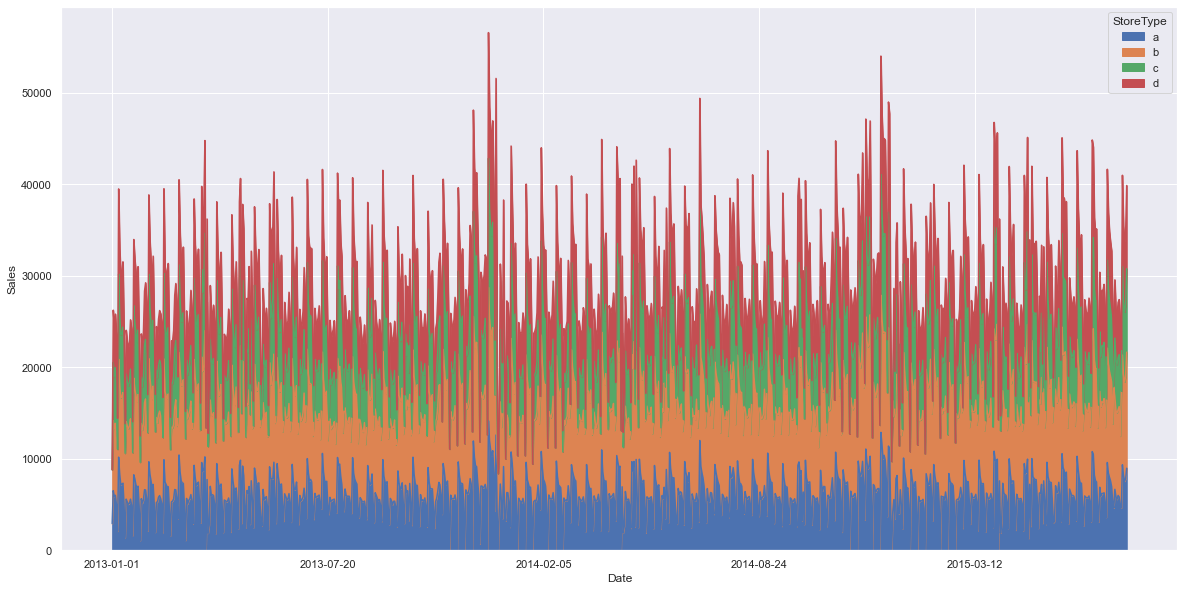

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date','StoreType'])['Sales'].mean().unstack().plot(ax=ax,kind='area')
plt.ylabel('Sales')

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

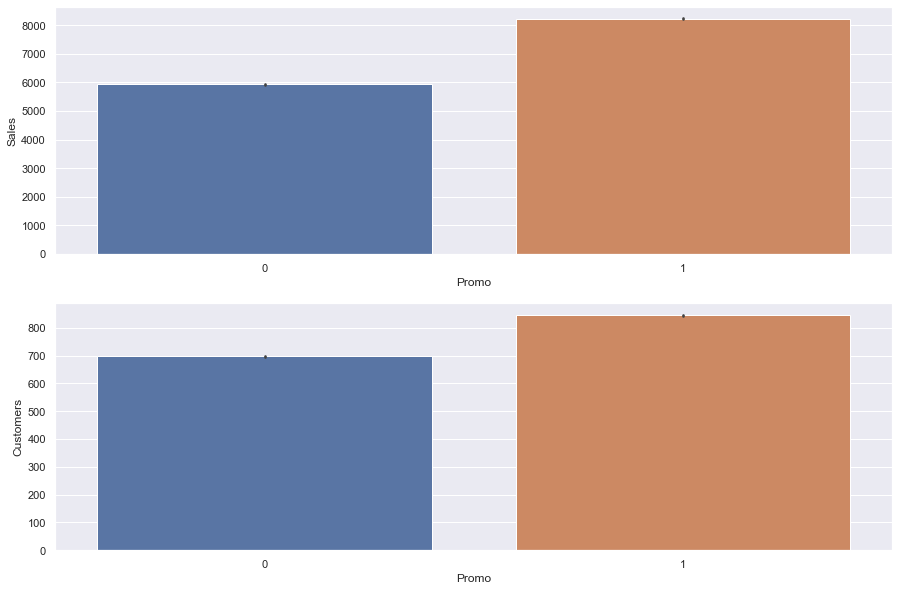

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.barplot(x='Promo',y='Sales',data=sales_train_all_df)

plt.subplot(212)
sns.barplot(x='Promo',y='Customers',data=sales_train_all_df)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

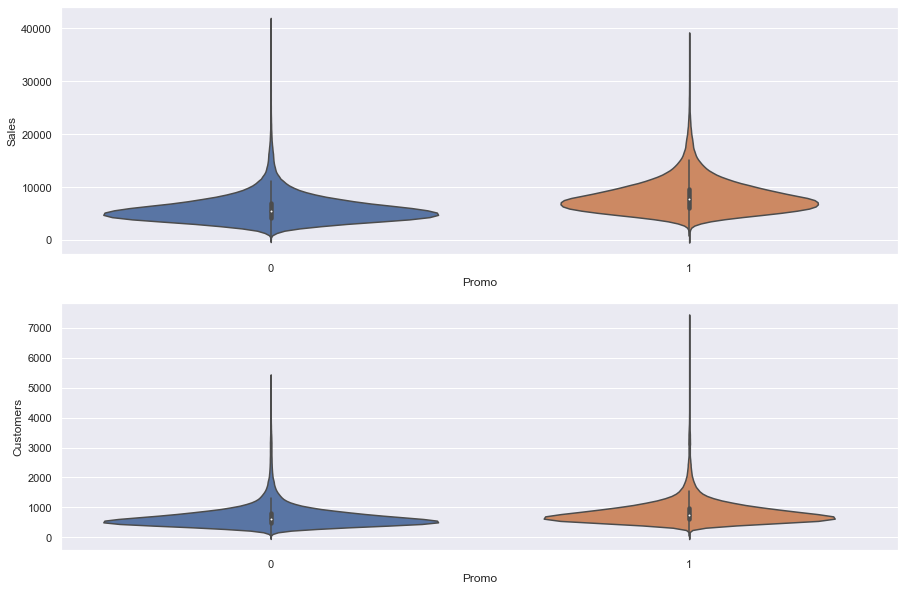

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.violinplot(x='Promo',y='Sales',data=sales_train_all_df)

plt.subplot(212)
sns.violinplot(x='Promo',y='Customers',data=sales_train_all_df)

In [49]:
#!pip install prophet

In [63]:
from prophet import Prophet

In [76]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
    
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date','Sales']].rename(columns = {'Date':'ds','Sales':'y'})
    sales_df = sales_df.sort_values('ds')
    
    model = Prophet(holidays = holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)

In [65]:
# Get all the dates pertaining to school holidays 
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday']==1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [66]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [67]:
# Get all the dates pertaining to state holidays 
state_holidays = sales_train_all_df[sales_train_all_df['StateHoliday']=='a'].loc[:, 'Date'].values
state_holidays.shape

(694,)

In [68]:
state_holidays

array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03', '2015-05-01', '2014-10-31',
       '2014-05-01', '2013-10-03', '2013-05-01', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2013-08-15', '2015-05-25',
       '2015-05-14', '2015-05-01', '2015-01-01', '2014-10-03',
       '2014-06-09', '2014-05-29', '2014-05-01', '2014-01-01',
       '2013-10-03', '2013-05-20', '2013-05-09', '2013-05-01',
       '2013-01-01', '2014-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2015-06-04', '2014-06-19', '2013-05-30', '2013-10-03',
       '2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-05-25', '2015-05-14', '2014-10-03',
       '2014-06-09', '2014-05-29', '2013-10-03', '2013-

In [69]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday':'state_holiday'})

In [70]:
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
689,2013-05-09,state_holiday
690,2013-08-15,state_holiday
691,2015-06-04,state_holiday
692,2014-06-19,state_holiday


In [71]:
school_holidays = pd.DataFrame({'ds':pd.to_datetime(school_holidays),
                                'holiday':'school_holiday'})

In [72]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [73]:
school_state_holidays = pd.concat((state_holidays,school_holidays))

In [74]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


00:38:01 - cmdstanpy - INFO - Chain [1] start processing
00:38:01 - cmdstanpy - INFO - Chain [1] done processing


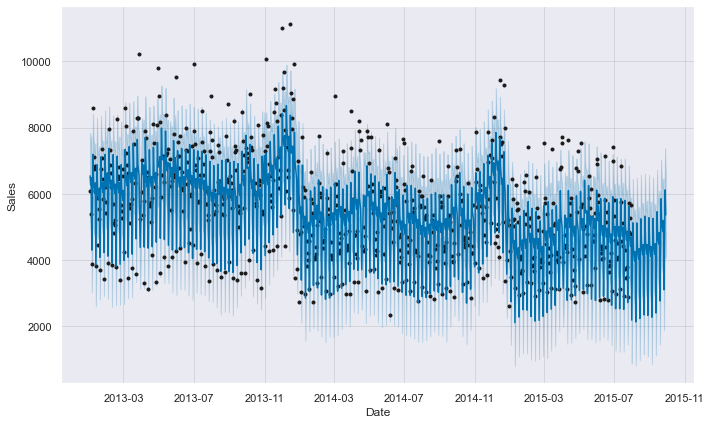

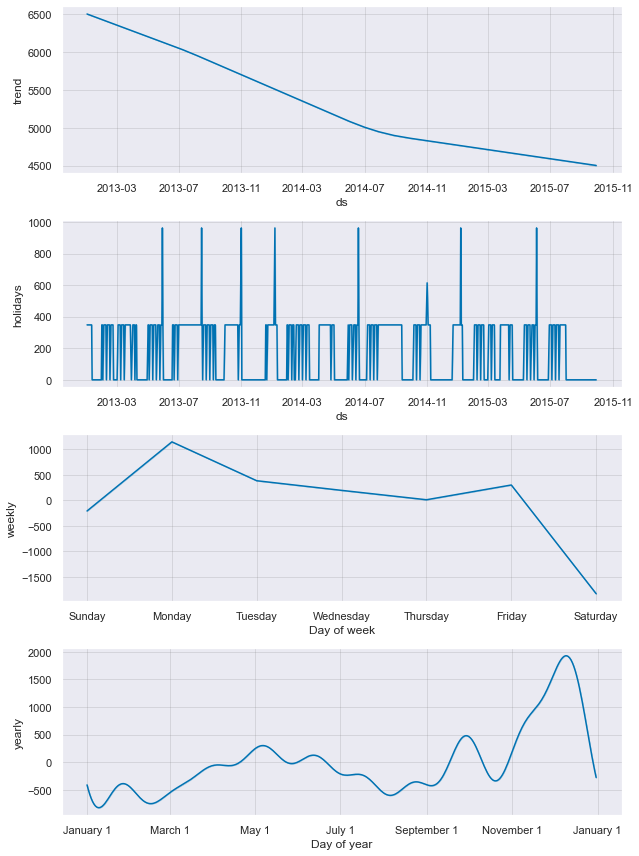

In [77]:
sales_prediction(6, sales_train_all_df, school_state_holidays, 60)